In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load the dataset: CDC's Chronic Disease Indicators (CDI)
# source: https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi

data = pd.read_csv('/Users/.../Downloads/chronic_disease.csv')
# view data
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [3]:
#basic info of the data, such as data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [4]:
# basic statistical analysis- if there is any NaN, Count, mean, std etc.
data.describe()

,YearStart,YearEnd,Response,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,LocationID,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
count,1.185676e+06,1.185676e+06,0.0,8.045780e+05,682380.000000,682380.000000,0.0,0.0,0.0,0.0,0.0,1.185676e+06,0.0,0.0,0.0,0.0
mean,2.015103e+03,2.015643e+03,NaN,1.005325e+03,50.264623,61.873881,NaN,NaN,NaN,NaN,NaN,3.078907e+01,NaN,NaN,NaN,NaN
std,3.320259e+00,3.001197e+00,NaN,1.880433e+04,89.004848,100.104303,NaN,NaN,NaN,NaN,NaN,1.750972e+01,NaN,NaN,NaN,NaN
min,2.001000e+03,2.001000e+03,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN
25%,2.013000e+03,2.013000e+03,NaN,1.610000e+01,11.000000,16.300000,NaN,NaN,NaN,NaN,NaN,1.700000e+01,NaN,NaN,NaN,NaN
50%,2.015000e+03,2.016000e+03,NaN,4.000000e+01,28.500000,41.000000,NaN,NaN,NaN,NaN,NaN,3.000000e+01,NaN,NaN,NaN,NaN
75%,2.018000e+03,2.018000e+03,NaN,7.600000e+01,56.300000,71.100000,NaN,NaN,NaN,NaN,NaN,4.500000e+01,NaN,NaN,NaN,NaN
max,2.021000e+03,2.021000e+03,NaN,2.925456e+06,2541.600000,3530.500000,NaN,NaN,NaN,NaN,NaN,7.800000e+01,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Histogram of Location ID')

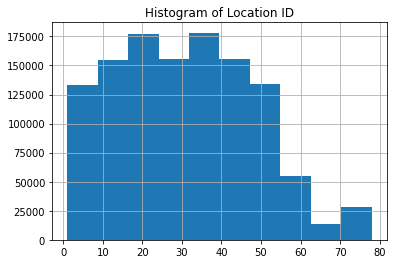

In [23]:
# we can use histogram to show the distribution of any variable
data['LocationID'].hist()
plt.title('Histogram of Location ID')

<AxesSubplot:>

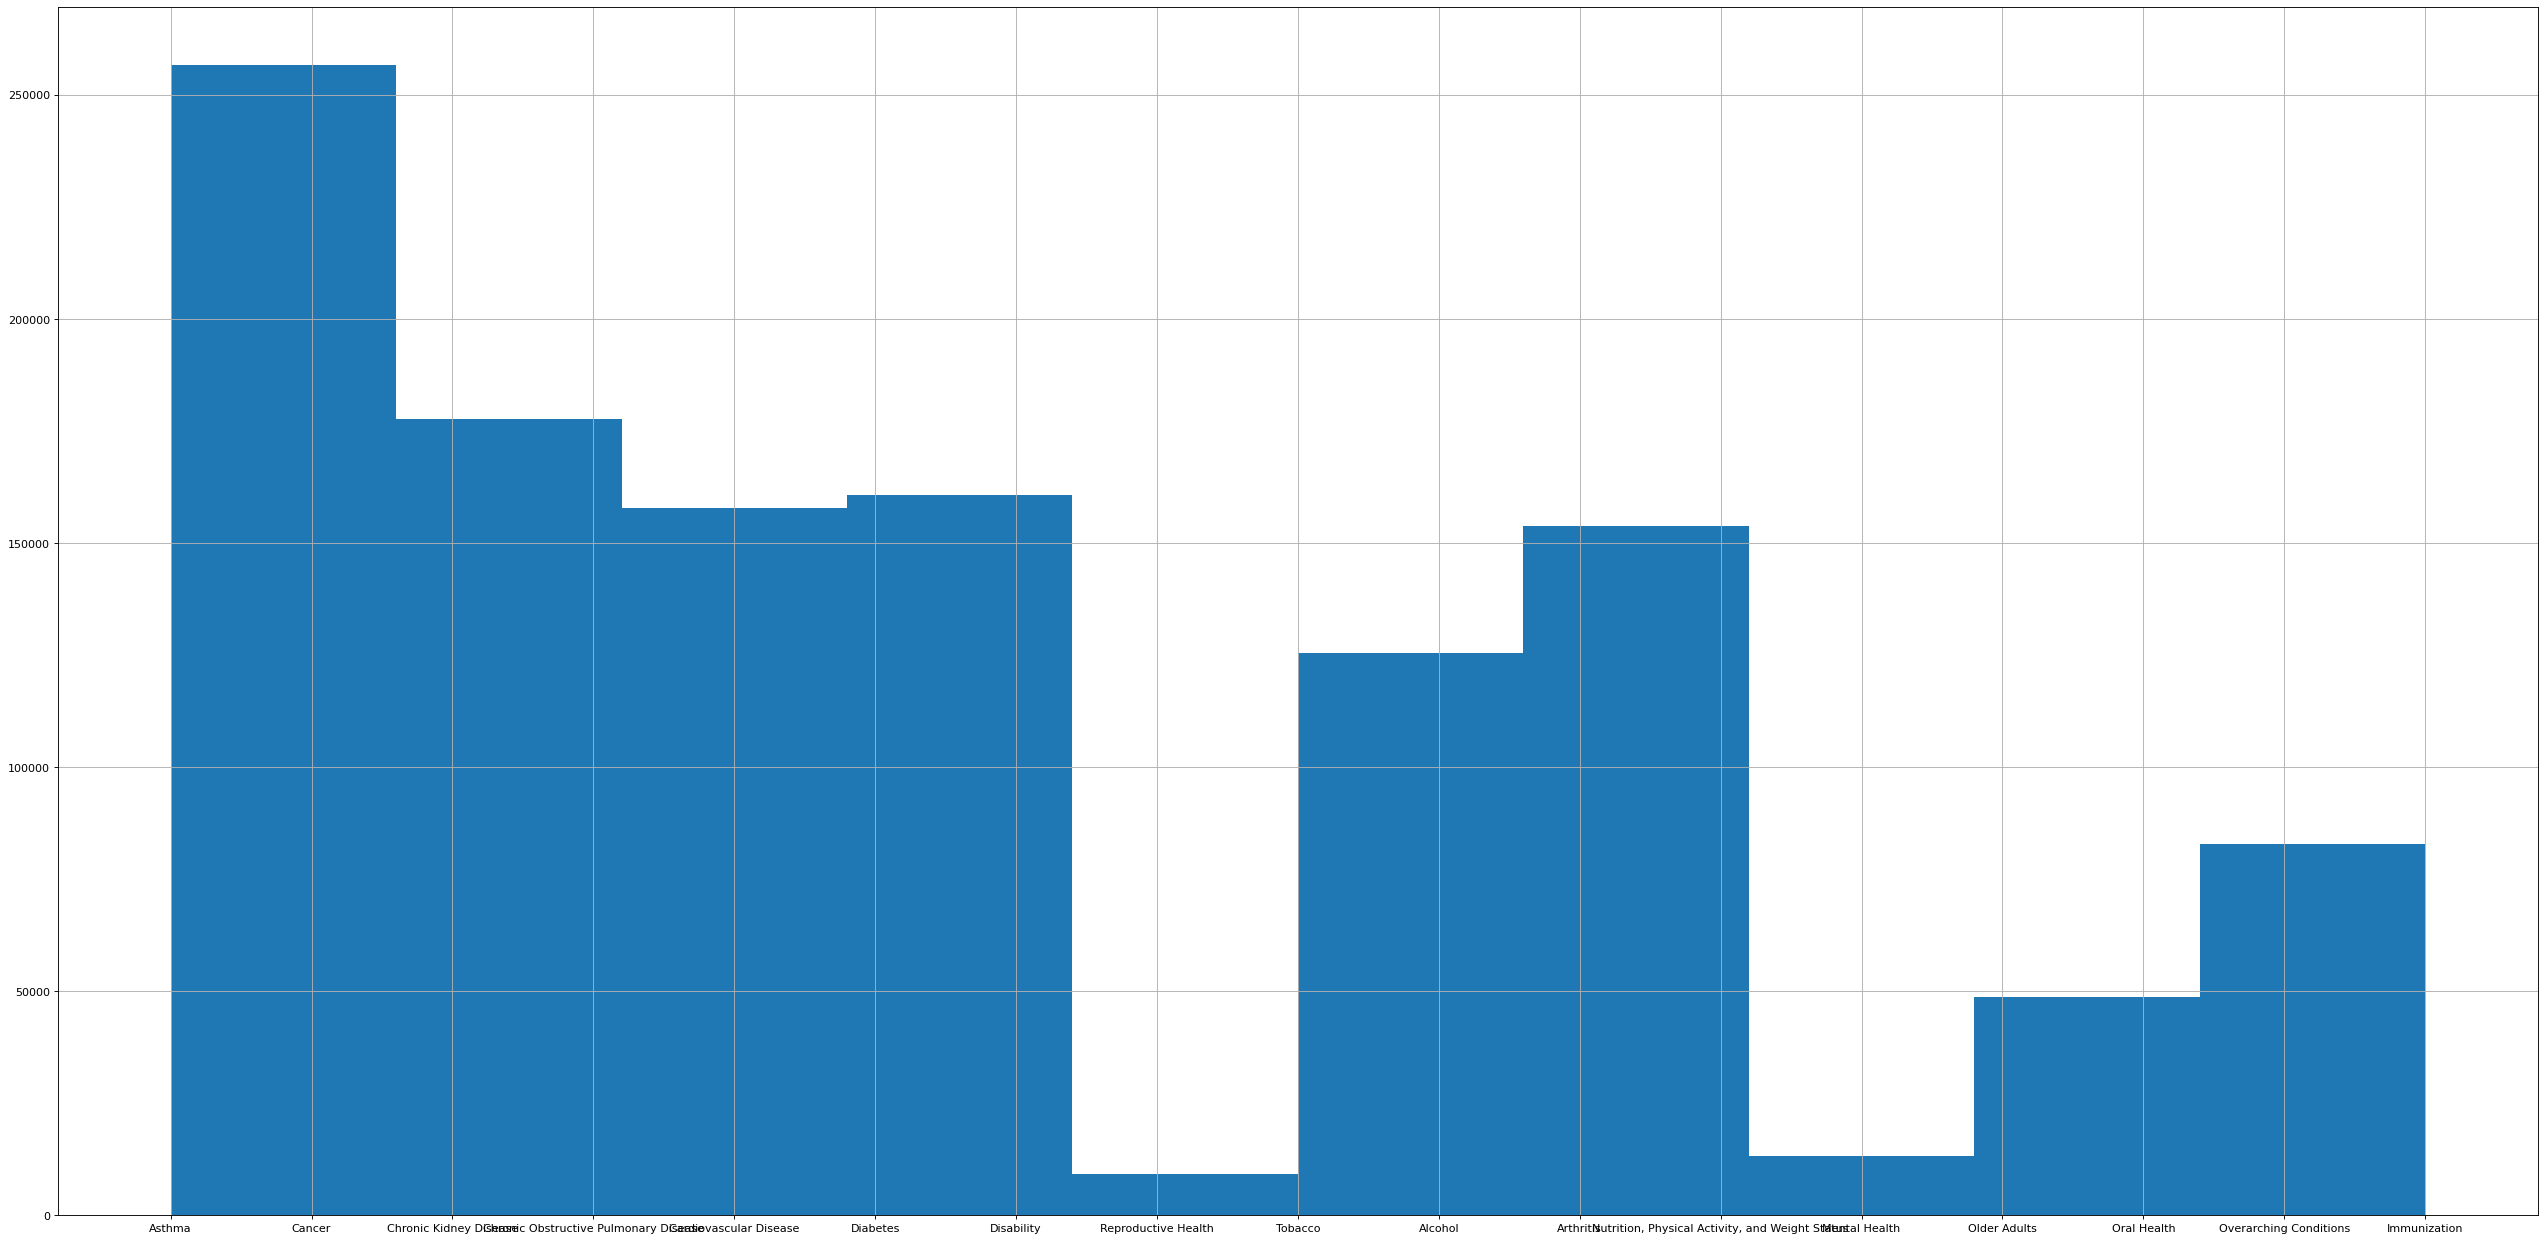

In [36]:
#histogram of the categorical variable 'Topic'
from matplotlib.pyplot import figure
figure(figsize=(40, 20), dpi=80)
data['Topic'].hist()


In [5]:
# the following function returns columns with missing values and the total number of missing values
data.isna().sum()

YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
Topic                              0
Question                           0
Response                     1185676
DataValueUnit                 152123
DataValueType                      0
DataValue                     378734
DataValueAlt                  381098
DataValueFootnoteSymbol       791966
DatavalueFootnote             791966
LowConfidenceLimit            503296
HighConfidenceLimit           503296
StratificationCategory1            0
Stratification1                    0
StratificationCategory2      1185676
Stratification2              1185676
StratificationCategory3      1185676
Stratification3              1185676
GeoLocation                    10166
ResponseID                   1185676
LocationID                         0
TopicID                            0
QuestionID                         0
D

{'whiskers': [<matplotlib.lines.Line2D at 0x2b50e61f850>,
 'caps': [<matplotlib.lines.Line2D at 0x2b50e61ffa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b50e61f880>],
 'medians': [<matplotlib.lines.Line2D at 0x2b50e7084f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b50e7087c0>],
 'means': []}

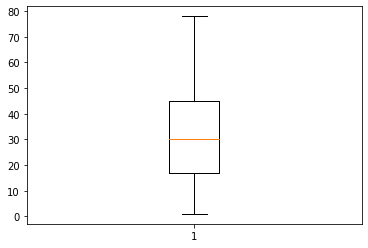

In [37]:
# Boxplot showing the distribution of a numeric variable
plt.boxplot(data['LocationID'])

In [6]:
# we can also get the counts in a category in the dataset
# here we picked the 'Topic' category and got the counts of each type of topics (disease here)
data['Topic'].value_counts()

Cancer                                             176339
Cardiovascular Disease                             157750
Diabetes                                           156808
Chronic Obstructive Pulmonary Disease              152874
Asthma                                              80342
Arthritis                                           78300
Nutrition, Physical Activity, and Weight Status     75418
Overarching Conditions                              73260
Alcohol                                             66091
Tobacco                                             59396
Older Adults                                        26316
Chronic Kidney Disease                              24731
Oral Health                                         22273
Mental Health                                       13200
Immunization                                         9570
Reproductive Health                                  9086
Disability                                           3922
Name: Topic, d

Here, we see that Cancer has the highest number of cases 176,339 followed by Cardiovascular disease and Diabetes.

In [8]:
# we can group the data based on some categorical variable
# this will help us view the effect of such categorical variables on the other variables
data.groupby('Topic').mean()

,YearStart,YearEnd,Response,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,LocationID,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
Topic,,,,,,,,,,,,,,,,
Alcohol,2015.845501,2015.845501,NaN,51.845832,10.451426,15.131979,NaN,NaN,NaN,NaN,NaN,31.041534,NaN,NaN,NaN,NaN
Arthritis,2016.000000,2016.000000,NaN,35.866560,29.465799,42.811095,NaN,NaN,NaN,NaN,NaN,31.542529,NaN,NaN,NaN,NaN
Asthma,2015.693884,2015.693884,NaN,356.905720,30.880679,42.846488,NaN,NaN,NaN,NaN,NaN,31.082448,NaN,NaN,NaN,NaN
Cancer,2011.881694,2015.505260,NaN,1301.655868,58.214001,63.725664,NaN,NaN,NaN,NaN,NaN,29.720249,NaN,NaN,NaN,NaN
Cardiovascular Disease,2015.400197,2015.400197,NaN,1437.111091,70.531336,84.812784,NaN,NaN,NaN,NaN,NaN,30.275119,NaN,NaN,NaN,NaN
Chronic Kidney Disease,2015.353322,2015.353322,NaN,737.288839,34.641149,42.892861,NaN,NaN,NaN,NaN,NaN,30.038777,NaN,NaN,NaN,NaN
Chronic Obstructive Pulmonary Disease,2015.330802,2015.330802,NaN,3278.987553,71.942970,86.767117,NaN,NaN,NaN,NaN,NaN,30.732211,NaN,NaN,NaN,NaN
Diabetes,2015.743974,2015.744675,NaN,955.271983,47.635779,62.020429,NaN,NaN,NaN,NaN,NaN,31.090155,NaN,NaN,NaN,NaN
Disability,2014.175676,2014.175676,NaN,36.447082,33.476783,39.419914,NaN,NaN,NaN,NaN,NaN,30.339623,NaN,NaN,NaN,NaN


<AxesSubplot:>

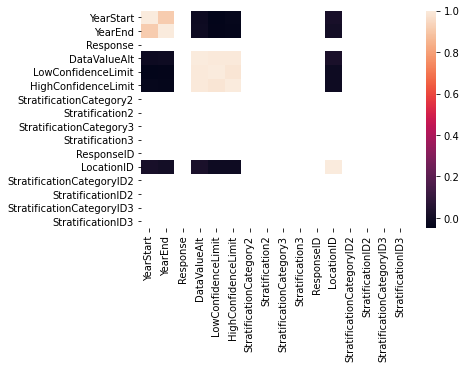

In [20]:
# check correlation of the variables and plot using heatmap
cor= data.corr()

sns.heatmap(cor)